# ASSIGNMENT 1: Iris Data Classification (Using TensorFlow)
### Prepared by [Mustafa Youldash, Ph.D.](https://github.com/youldash)

### The Iris Data Set (i.e., Problem Set)

The [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris/) is a popular data set for classification tasks in machine learning. It consists of 150 samples of iris plants, with each sample consisting of four features (sepal length, sepal width, petal length, and petal width) and a target label indicating the species of the iris plant (setosa, versicolor, or virginica).

To solve the assignment using the Iris data set, students would need to preprocess the data, develop and train a Deep Learning model, and evaluate the performance of the model. Preprocessing the data might involve scaling the features and splitting the data into training and validation sets. Developing and training the model could involve selecting an appropriate architecture and optimization algorithm, setting the learning rate, and choosing the number of epochs. Evaluating the performance of the model could involve using metrics such as accuracy, precision, and recall to assess the model's ability to classify the iris plants correctly.

In [1]:
# What version of Python do you have?

import sys
print (sys.version) # 3.10.5 

3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]


In [2]:
# Do you have TensorFlow installed?

import tensorflow

print(tensorflow.__version__) # 2.9.0

2.9.0


##### <b> Done by </b> : Fatima Algharash. #2200002685 

## Exploratory data analysis - EDA 📊

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Fatima/Desktop/Iris - DL assigment/Iris dataset/IRIS.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape # to get the no of rows =150 & #5 features- original 4.

(150, 5)

In [8]:
df.info() # all float except the "species" - obj.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- No null values in all feactures.
- 1 of the features only is catergorical. -species- (target).

In [9]:
df.isnull().sum() #no missing values!

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.nunique() #unique values for each feature

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [11]:
df["species"].unique()  #3 types..

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### check for duplicates

In [12]:
df.duplicated().sum() # three entries with some duplictes values.

3

In [13]:
df[df.duplicated()] # here are they.

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### Species -

to check wether it's balanced or not.

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


Text(0.5, 1.0, 'The number of iris species we have.')

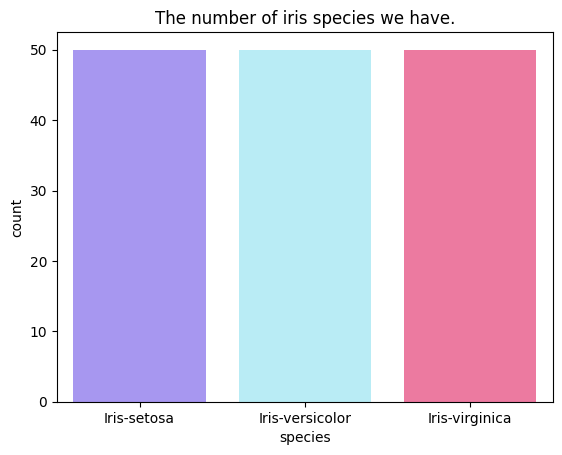

In [14]:
target_temp = df.species.value_counts()
print(target_temp)
#plotting 
sns.countplot(x=df["species"], palette=['#9D88FF', '#AFF3FF', "#FF679A"] )
plt.title('The number of iris species we have.')


- That indicates that the data is well balanced!
- No need to delete the duplictes since it's aleardy balanced.
- The count for each species is exaclty 50

<b> Balanced dataset </b>

#### 2D scatter plot

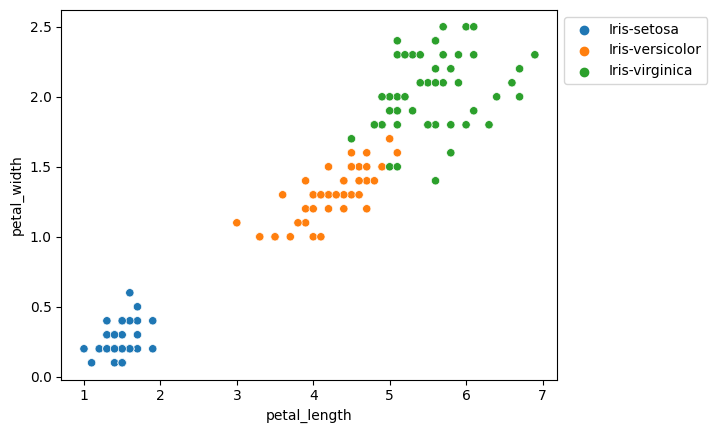

In [15]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

- We can see that there's an overlaping between the two types which are : Iris-versicolor & Iris-virginica
- We can distinguish Setosa flowers from others.

- This indicates that most 3 main ideas: <br>
1- setosa usaully have shorter petal lenght and width.<br>
2- versicolor however tends to have medium length and width.<br>
3- virginica in the other hand, is quite length and large in width as well compares to the others.

### Now lest's have a closer look.. <br>
using <b>Pair plots</b>

- The histogram/PDF shows the distribution of a single variable.
- The scatter plots show us the relationship between the features.

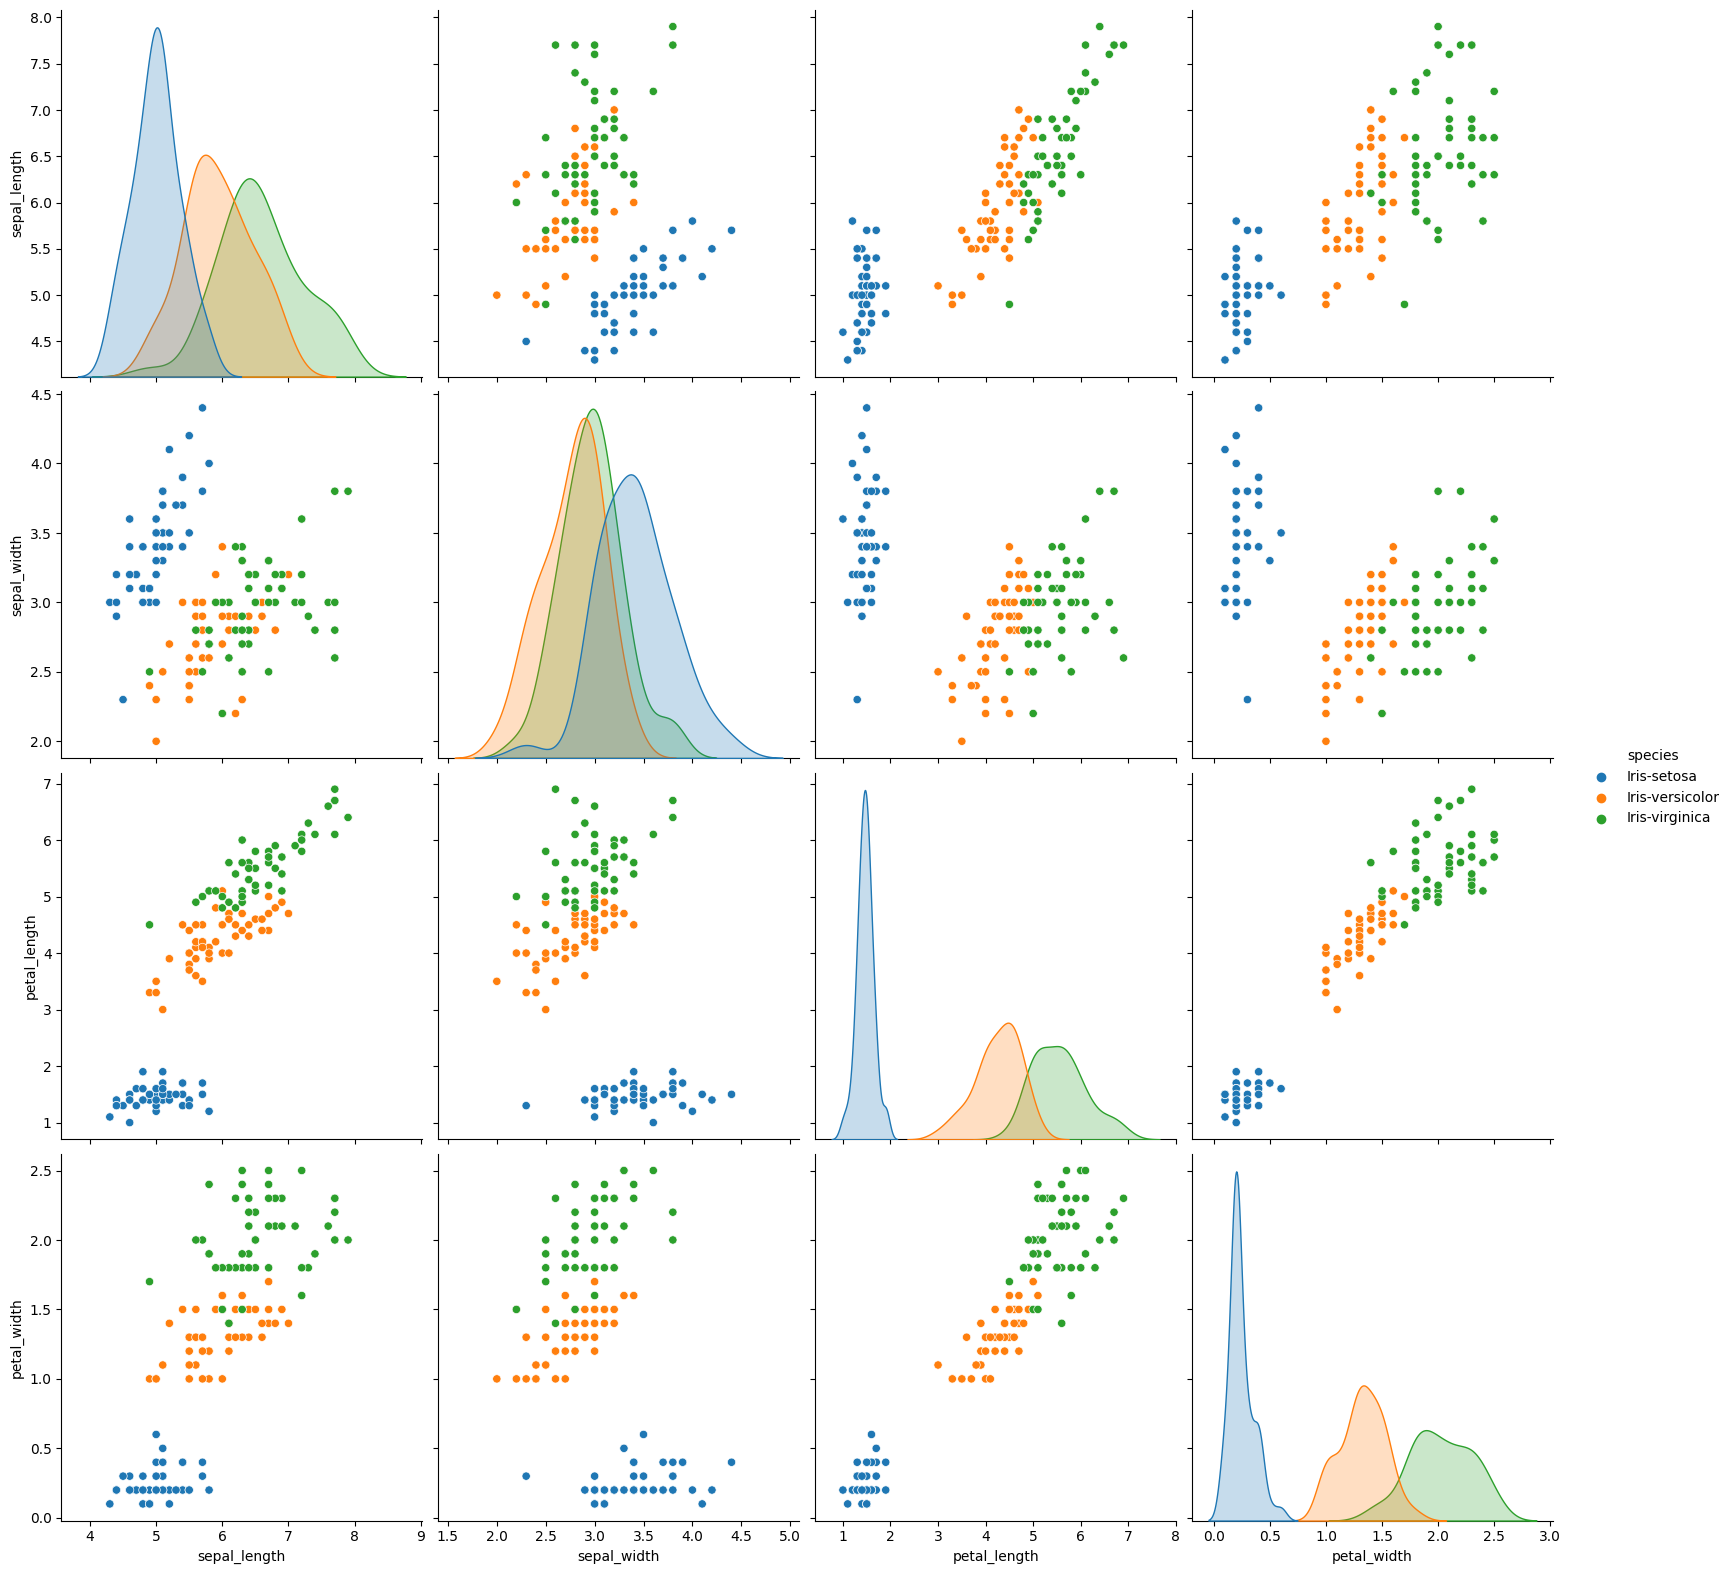

In [16]:
#sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=4) # goood to show both distribution & relationship between var.

- High co relation between petal length and width columns.
- Setosa has both low petal length and width
- Versicolor has both average petal length and width
- Virginica has both high petal length and width.
- Sepal width for setosa is high and length is low.
- Versicolor have average values for for sepal dimensions.
- Virginica has small width but large sepal length

c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-pa

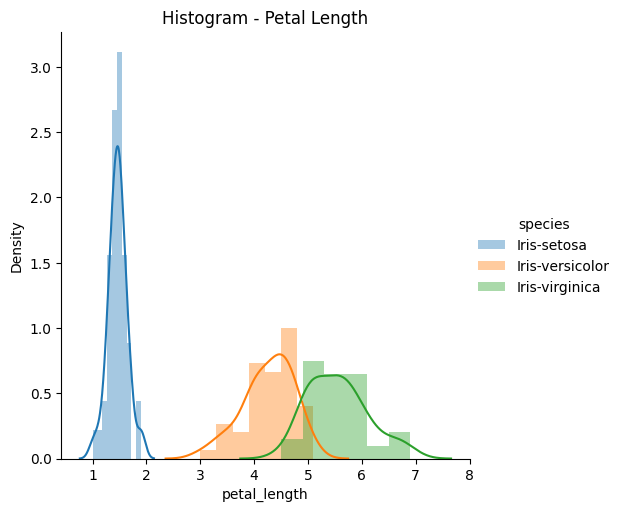

c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-pa

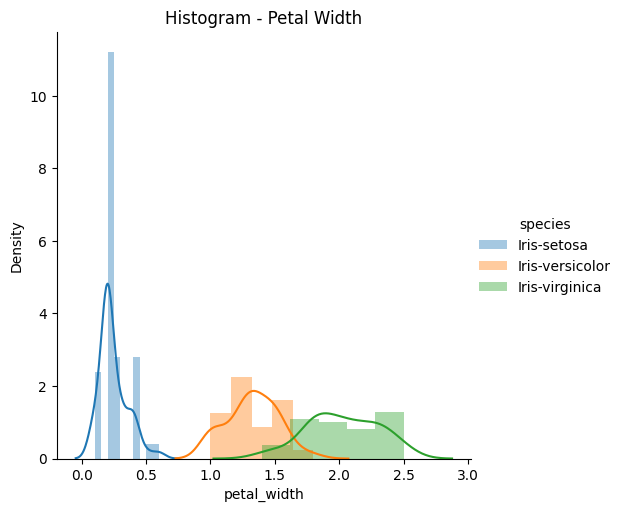

c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-pa

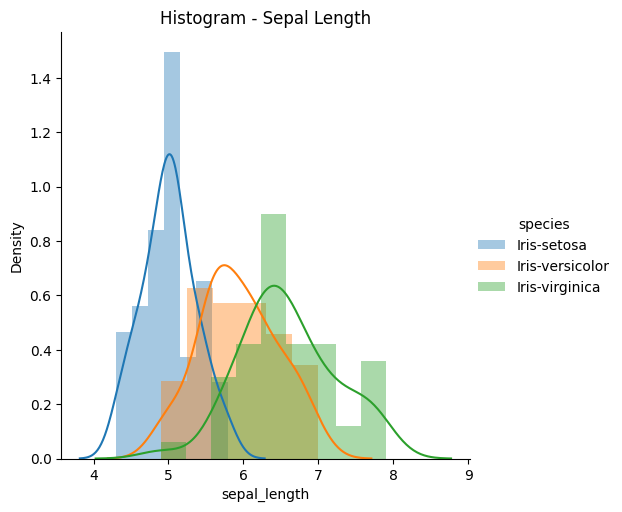

c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python\Python3.10.5\lib\site-pa

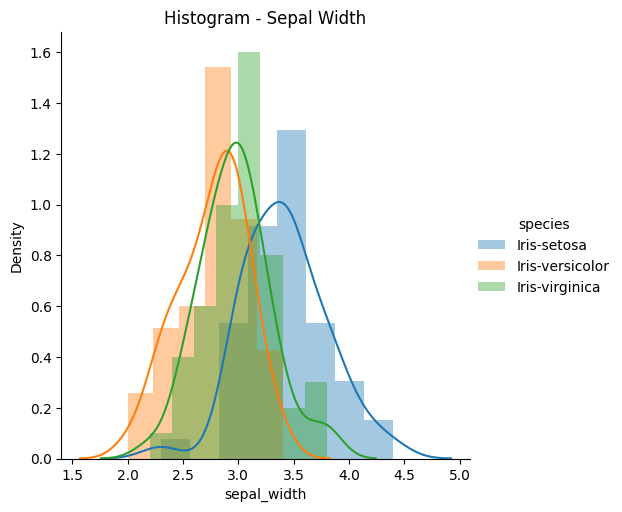

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Creating a FacetGrid (1)
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend()
# Displaying the plot
plt.title("Histogram - Petal Length")
plt.show()

# Creating a FacetGrid (2)
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend()
plt.title("Histogram - Petal Width")
plt.show()

# Creating a FacetGrid (3)
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend()
plt.title("Histogram - Sepal Length")
plt.show()

# Creating a FacetGrid (4)
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend()
plt.title("Histogram - Sepal Width")
plt.show()


- sepal_length and sepal width >> Too much overlapping.
- PL>PW>SL>SW

#### Matrix plots

In [18]:
from sklearn.preprocessing import LabelEncoder

# Encoding the species labels using one-hot encoding
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

[]

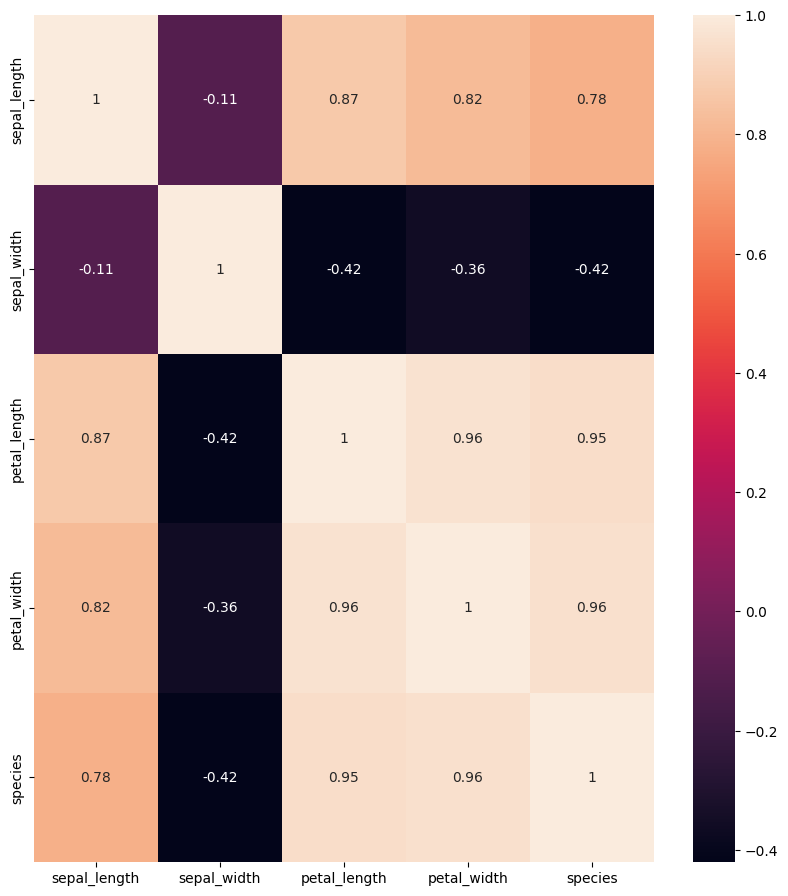

In [19]:
#to veiw the colleration +/-
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

From the heatmap we could indicates the following:
- sepal_length & petal_width are slightly (to some extent) <b> correlated </b> with each other

### Now let's try to understanding the central tendency and distribution of the data.

<b>Central Tendency:</b> <br>
using both <b> Mean </b> and <b> Median  </b> <br>

- <b> Mean</b> : understanding where most data points are concentrated.
- <b> Median</b> :  not affected by extreme outliers. It helps in finding the midpoint of the data distribution.

If the mean is significantly different from the median, it can indicate the presence of outliers. <br>
Also, it can give insights into the symmetry or skewness of the data distribution.

In [20]:
df.groupby("species").agg(["mean", "median"]) #for each species 
# 0 ---- > Iris-setosa
# 1 ---- > Iris-versicolor   
# 2 ---- > Iris-virginica

sepal_length        sepal_width        petal_length          
                mean median        mean median         mean median   
species                                                              
0              5.006    5.0       3.418    3.4        1.464   1.50  \
1              5.936    5.9       2.770    2.8        4.260   4.35   
2              6.588    6.5       2.974    3.0        5.552   5.55   

        petal_width         
               mean median  
species                     
0             0.244    0.2  
1             1.326    1.3  
2             2.026    2.0

 Since the mean and median are approximately equal > the data distribution is likely symmetric

# Preprocessing

- Dealing with outliear ( "if any found")

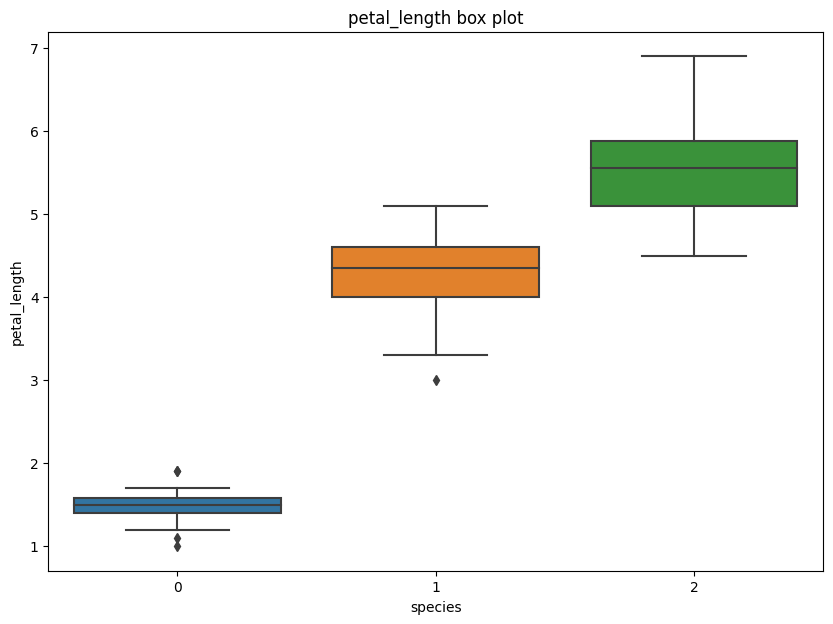

In [21]:
plt.figure(figsize=(10,7))
plt.title('petal_length box plot')
sns.boxplot(x="species",y="petal_length", data=df)
plt.show()

- Iris-setosa is the only type with considerable amount of outliers.

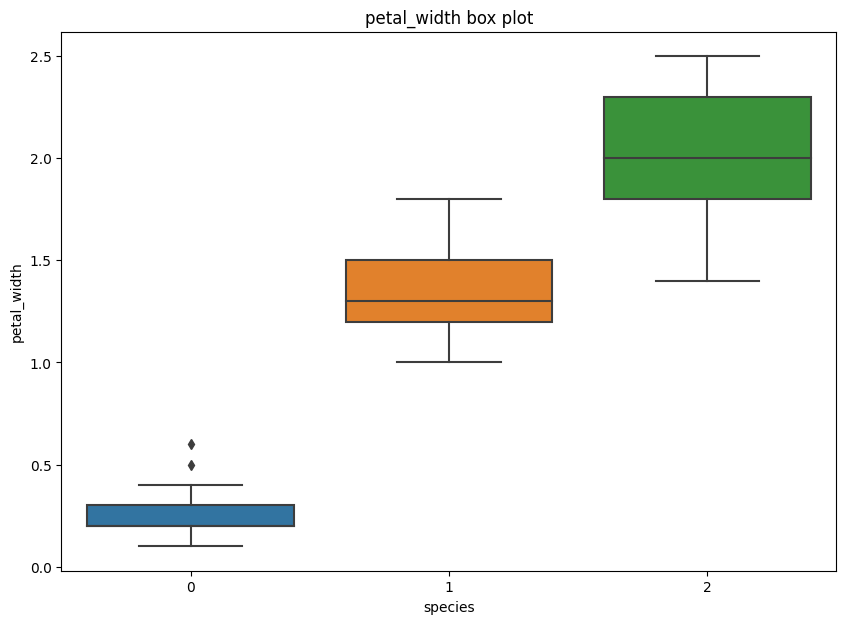

In [22]:
plt.figure(figsize=(10,7))
plt.title('petal_width box plot')
sns.boxplot(x="species",y="petal_width", data=df)
plt.show()

- as we can see outliers appears to be in Iris-setosa again

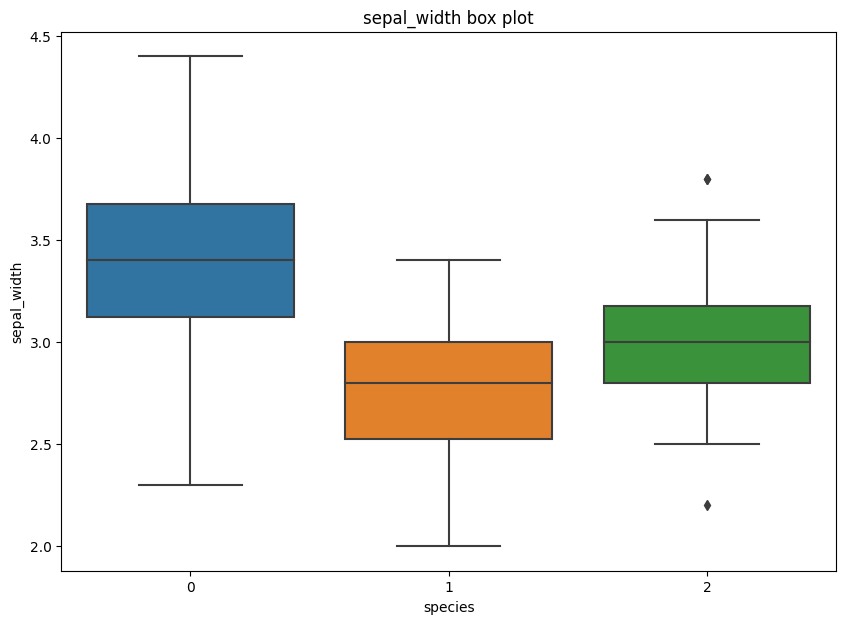

In [23]:
plt.figure(figsize=(10,7))
plt.title('sepal_width box plot')
sns.boxplot(x="species",y="sepal_width", data=df)
plt.show()

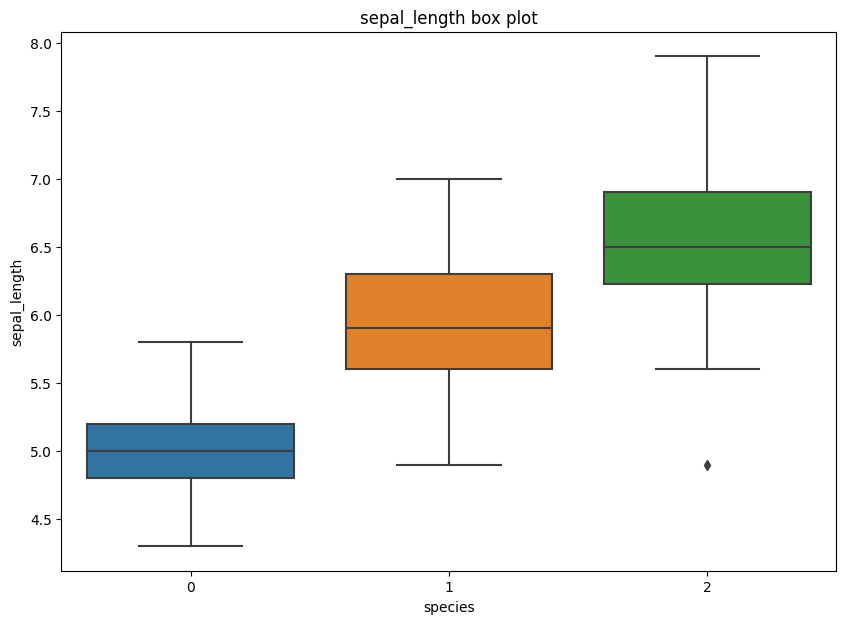

In [24]:
plt.figure(figsize=(10,7))
plt.title('sepal_length box plot')
sns.boxplot(x="species",y="sepal_length", data=df)
plt.show()

- the other two box_plot indicates that Iris-virginica is the only type with slight outliers

we can detect outliers as data points that fall outside the whiskers

From the plots above, we can say:  <br>

- Setosa species have some outliers in the Petal length and width.

#### How to deal with these outliers

<Axes: xlabel='sepal_width'>

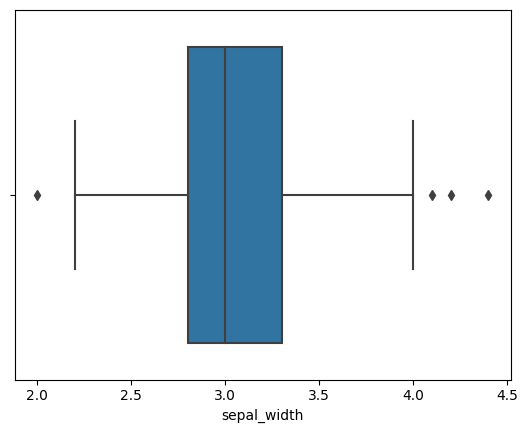

In [25]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.boxplot(x='sepal_width', data=df)

Old Shape:  (150, 5)
New Shape:  (146, 5)


C:\Users\Fatima\AppData\Local\Temp\ipykernel_10424\1139950301.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['sepal_width'], 25, interpolation='midpoint')
C:\Users\Fatima\AppData\Local\Temp\ipykernel_10424\1139950301.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['sepal_width'], 75, interpolation='midpoint')


<Axes: xlabel='sepal_width'>

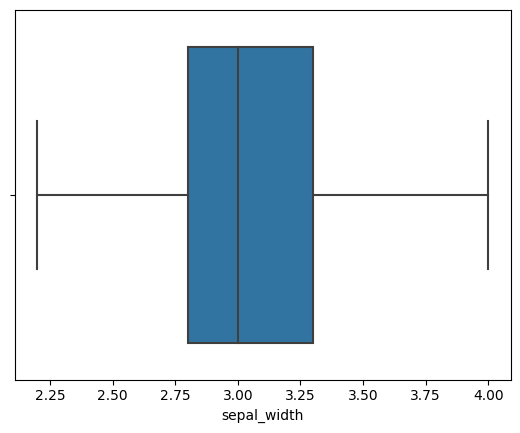

In [26]:
# Importing
import numpy as np
import pandas as pd
import seaborn as sns

# IQR
Q1 = np.percentile(df['sepal_width'], 25, interpolation='midpoint')
Q3 = np.percentile(df['sepal_width'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['sepal_width'] >= (Q3 + 1.5 * IQR))

# Lower bound
lower = np.where(df['sepal_width'] <= (Q1 - 1.5 * IQR))

# Removing the Outliers
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepal_width', data=df)

<Axes: xlabel='petal_width'>

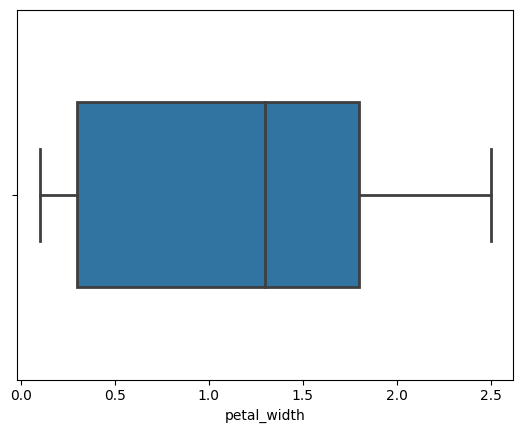

In [27]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

#petal_width _length palette="husl"
sns.boxplot(x='petal_width', data=df, width=0.5, linewidth=2, fliersize=8)

<Axes: xlabel='petal_length'>

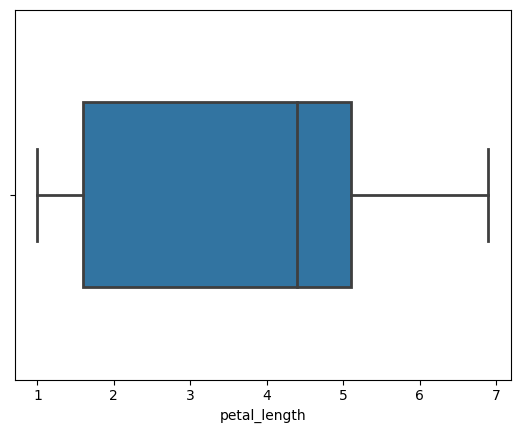

In [28]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

#petal_width _length palette="husl"
sns.boxplot(x='petal_length', data=df, width=0.5, linewidth=2, fliersize=8)

# Iris Flower Classification

In [29]:
# general Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import requests
import os

#keras.
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import SGD,Adam

#sklearn.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [30]:

# Encode text values to indexes (i.e., [1],[2],[3] for (red,green,blue) values).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas DataFrame to the (x,y) inputs that TensorFlow needs.
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
            
    # Find out the type of the target column. Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    
# Encode text values to indexes (i.e., [1],[2],[3] for (red,green,blue) values).
species = encode_text_index(df, "species")

# Convert a Pandas DataFrame to the (x,y) inputs that TensorFlow needs.
x, y = to_xy(df, "species")

### Splitting data

In [31]:
test_split = 0.20

# Split the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=test_split, random_state=42)

### First try: model_1 <br> 
<b> Defining stage: </b>
- no. of nreuons  : 4 or 10 (input/hidden layer) 
- Output layer : activation='softmax' <br>

<b> compiling stage: </b>
- loss='categorical_crossentropy'
- optimizer=Adam(learning_rate=0.001) <br>


<b> Training stage: </b>
- epochs=160

In [38]:
# Define, and build your model_1.
model_1 = Sequential()
model_1.add(Dense(4, input_dim=x.shape[1], kernel_initializer='normal', 
                activation='relu',
                name='Input')) # Hint: try different activation functions and see which one produces better results.
model_1.add(Dense(4, kernel_initializer='normal', name='Hidden')) 
model_1.add(Dense(y.shape[1],activation='softmax', name='Output'))


model_1.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.001), #rmsprop - optimizer=Adam(learning_rate=0.01) - SGD 
    metrics=['accuracy']) 

# Define the training callbacks.
monitor = EarlyStopping(
    monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [39]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 4)                 20        
                                                                 
 Hidden (Dense)              (None, 4)                 20        
                                                                 
 Output (Dense)              (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Train the model.
history = model_1.fit(
    x, y, validation_data=(x_test,y_test),
    callbacks=[monitor], verbose=2, epochs=160)

Epoch 1/160


5/5 - 2s - loss: 1.0965 - accuracy: 0.3356 - val_loss: 1.0956 - val_accuracy: 0.2667 - 2s/epoch - 380ms/step
Epoch 2/160
5/5 - 0s - loss: 1.0946 - accuracy: 0.3836 - val_loss: 1.0937 - val_accuracy: 0.5667 - 112ms/epoch - 22ms/step
Epoch 3/160
5/5 - 0s - loss: 1.0926 - accuracy: 0.4521 - val_loss: 1.0918 - val_accuracy: 0.3333 - 120ms/epoch - 24ms/step
Epoch 4/160
5/5 - 0s - loss: 1.0900 - accuracy: 0.3425 - val_loss: 1.0894 - val_accuracy: 0.3333 - 142ms/epoch - 28ms/step
Epoch 5/160
5/5 - 0s - loss: 1.0874 - accuracy: 0.3425 - val_loss: 1.0865 - val_accuracy: 0.3333 - 138ms/epoch - 28ms/step
Epoch 6/160
5/5 - 0s - loss: 1.0853 - accuracy: 0.3425 - val_loss: 1.0836 - val_accuracy: 0.3333 - 90ms/epoch - 18ms/step
Epoch 7/160
5/5 - 0s - loss: 1.0813 - accuracy: 0.3425 - val_loss: 1.0802 - val_accuracy: 0.3333 - 89ms/epoch - 18ms/step
Epoch 8/160
5/5 - 0s - loss: 1.0781 - accuracy: 0.3425 - val_loss: 1.0768 - val_accuracy: 0.3333 - 89ms/epoch - 18ms/step
Epoch 9/160
5/5 - 0s - loss: 1.07

In [41]:
from sklearn import metrics


# Evaluate the success rate using accuracy.
pred = model_1.predict(x_test)
y_pred_class = np.argmax(pred,axis=1)

y_test_class = np.argmax(y_test,axis=1)

# Log the accuracy score.
score = metrics.accuracy_score(y_test_class, y_pred_class)
print("Accuracy score: {}".format(score))

1/1 [==============================] - 0s 240ms/step
Accuracy score: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



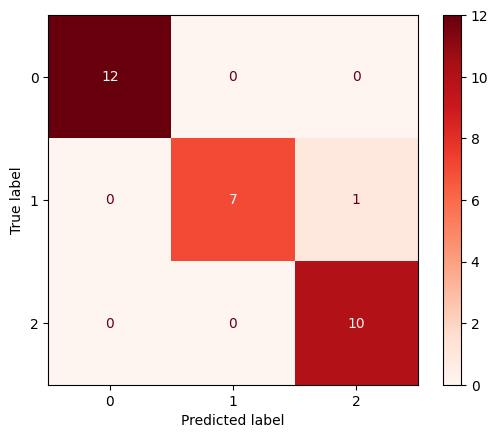

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test_class, y_pred_class))

cm =confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["species"].unique())
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [44]:
results_df = pd.DataFrame.from_dict(history.history)

<Axes: >

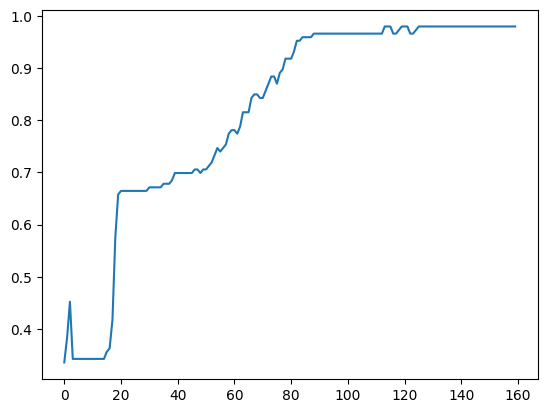

In [45]:
results_df['accuracy'].plot()

<Axes: >

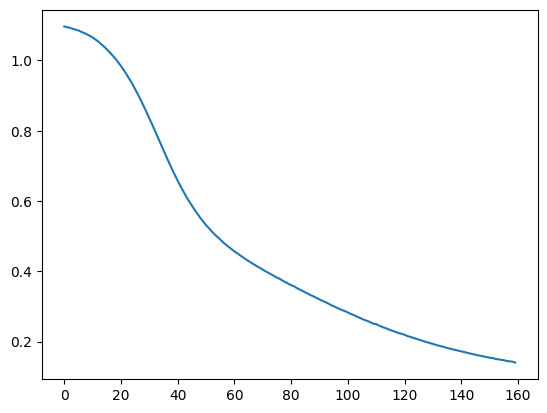

In [46]:
results_df['loss'].plot()


Training - <br>
- accuracy: ~98%
- loss: 0.1405 <br>


Testing - <br>
- accuracy: ~97%
- loss: 0.1275

Input layer : activation='relu'

### Second Try: Model_2

In [59]:
# Define, and build your model_2.
model_2 = Sequential()
model_2.add(Dense(4, input_dim=x.shape[1], kernel_initializer='normal', #
                activation='relu',
                name='Input')) # Hint: try different activation functions and see which one produces better results.
model_2.add(Dense(10, kernel_initializer='normal', name='Hidden')) #sigmoid
model_2.add(Dense(y.shape[1],activation='softmax', name='Output'))


model_2.compile(
    loss='categorical_crossentropy', #rmsprop - optimizer=Adam(learning_rate=0.01) SGD - categorical_crossentropy
    optimizer=Adam(learning_rate=0.001), #0.002
    #optimizer = sgd,
    metrics=['accuracy']) # Hint: try different optimizers and see which one produces better results.

# Define the training callbacks.
monitor = EarlyStopping(
    monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [60]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 4)                 20        
                                                                 
 Hidden (Dense)              (None, 10)                50        
                                                                 
 Output (Dense)              (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Train the model.
history_2 = model_2.fit(
    x, y, validation_data=(x_test,y_test),
    callbacks=[monitor], verbose=2, epochs=160)

Epoch 1/160


5/5 - 2s - loss: 1.1013 - accuracy: 0.3356 - val_loss: 1.1035 - val_accuracy: 0.2667 - 2s/epoch - 364ms/step
Epoch 2/160
5/5 - 0s - loss: 1.1000 - accuracy: 0.3356 - val_loss: 1.1022 - val_accuracy: 0.2667 - 104ms/epoch - 21ms/step
Epoch 3/160
5/5 - 0s - loss: 1.0991 - accuracy: 0.3356 - val_loss: 1.1015 - val_accuracy: 0.2667 - 108ms/epoch - 22ms/step
Epoch 4/160
5/5 - 0s - loss: 1.0987 - accuracy: 0.3356 - val_loss: 1.1012 - val_accuracy: 0.2667 - 90ms/epoch - 18ms/step
Epoch 5/160
5/5 - 0s - loss: 1.0980 - accuracy: 0.3356 - val_loss: 1.1004 - val_accuracy: 0.2667 - 89ms/epoch - 18ms/step
Epoch 6/160
5/5 - 0s - loss: 1.0973 - accuracy: 0.3219 - val_loss: 1.0998 - val_accuracy: 0.3000 - 101ms/epoch - 20ms/step
Epoch 7/160
5/5 - 0s - loss: 1.0966 - accuracy: 0.3425 - val_loss: 1.0992 - val_accuracy: 0.3333 - 96ms/epoch - 19ms/step
Epoch 8/160
5/5 - 0s - loss: 1.0958 - accuracy: 0.3425 - val_loss: 1.0979 - val_accuracy: 0.3333 - 90ms/epoch - 18ms/step
Epoch 9/160
5/5 - 0s - loss: 1.094

In [62]:
#training accuracy:
training_accuracy_values = history_2.history['accuracy']

print("Training Accuracy:", training_accuracy_values[-1])

Training Accuracy: 0.9794520735740662


In [63]:
from sklearn import metrics

# Evaluate the success rate using accuracy.
pred_2 = model_2.predict(x_test)
y_pred_2_class = np.argmax(pred_2,axis=1)

y_test_2_class = np.argmax(y_test,axis=1)

# Log the accuracy score.
score = metrics.accuracy_score(y_test_2_class, y_pred_2_class)
print("Accuracy score: {}".format(score))

1/1 [==============================] - 0s 152ms/step
Accuracy score: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



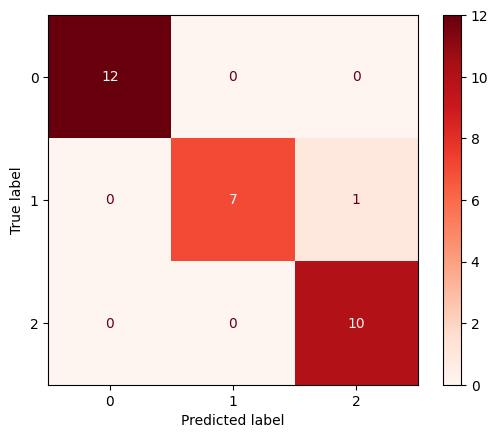

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test_2_class, y_pred_2_class))

cm =confusion_matrix(y_test_2_class, y_pred_2_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["species"].unique())
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [65]:
results_df_2 = pd.DataFrame.from_dict(history_2.history)

<Axes: >

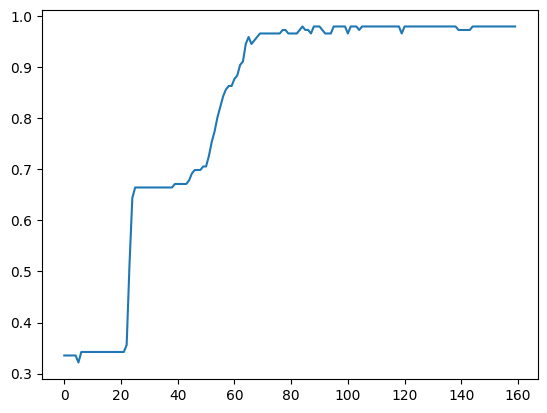

In [66]:
results_df_2['accuracy'].plot()

<Axes: >

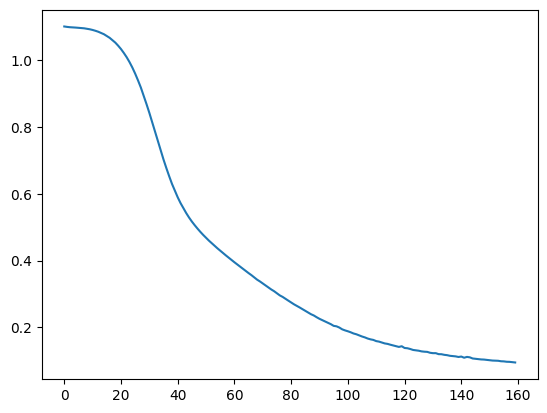

In [67]:
results_df_2['loss'].plot()

Training - <br>
- accuracy: ~98%
- loss: 0.0949 <br>

Testing - <br>
- accuracy: ~97%
- loss: 0.0901

Input layer : activation='relu'

<b> Better than model_1 </b>

## Thrid Try: Model_3

In [106]:
# Define, and build your model_3.
model_3 = Sequential()
model_3.add(Dense(4, input_dim=x.shape[1], kernel_initializer='normal', #
                activation='sigmoid', # NEW : same as model_1 but with sigmoid
                name='Input')) 
model_3.add(Dense(4, kernel_initializer='normal', name='Hidden')) 
model_3.add(Dense(y.shape[1],activation='softmax', name='Output'))

# Define RMSProp optimizer with a specific learning rate 
import tensorflow as tf
learning_rate = 0.01
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

model_3.compile(
    loss='categorical_crossentropy', #rmsprop - optimizer=Adam(learning_rate=0.01) SGD - categorical_crossentropy
    optimizer=optimizer, #0.01
    metrics=['accuracy']) # Hint: try different optimizers and see which one produces better results.

# Define the training callbacks.
monitor = EarlyStopping(
    monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


In [107]:
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 4)                 20        
                                                                 
 Hidden (Dense)              (None, 4)                 20        
                                                                 
 Output (Dense)              (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Train the model.
history_3 = model_3.fit(
    x, y, validation_data=(x_test,y_test),
    callbacks=[monitor], verbose=2, epochs=80) # less - since (0.01)

Epoch 1/80


5/5 - 2s - loss: 1.0998 - accuracy: 0.3699 - val_loss: 1.1111 - val_accuracy: 0.2667 - 2s/epoch - 420ms/step
Epoch 2/80
5/5 - 0s - loss: 1.1015 - accuracy: 0.3973 - val_loss: 1.0914 - val_accuracy: 0.2667 - 101ms/epoch - 20ms/step
Epoch 3/80
5/5 - 0s - loss: 1.0874 - accuracy: 0.3082 - val_loss: 1.0645 - val_accuracy: 0.5333 - 89ms/epoch - 18ms/step
Epoch 4/80
5/5 - 0s - loss: 1.0726 - accuracy: 0.3904 - val_loss: 1.0366 - val_accuracy: 0.8333 - 93ms/epoch - 19ms/step
Epoch 5/80
5/5 - 0s - loss: 1.0246 - accuracy: 0.8425 - val_loss: 0.9738 - val_accuracy: 0.7333 - 97ms/epoch - 19ms/step
Epoch 6/80
5/5 - 0s - loss: 0.9580 - accuracy: 0.6781 - val_loss: 0.8782 - val_accuracy: 0.7333 - 97ms/epoch - 19ms/step
Epoch 7/80
5/5 - 0s - loss: 0.8672 - accuracy: 0.7260 - val_loss: 0.7565 - val_accuracy: 0.7333 - 93ms/epoch - 19ms/step
Epoch 8/80
5/5 - 0s - loss: 0.7581 - accuracy: 0.6986 - val_loss: 0.6515 - val_accuracy: 0.7333 - 89ms/epoch - 18ms/step
Epoch 9/80
5/5 - 0s - loss: 0.6653 - accura

In [109]:
#training accuracy:
training_accuracy_values = history_3.history['accuracy']

print("Training Accuracy:", training_accuracy_values[-1])

Training Accuracy: 0.9452054500579834


In [110]:
from sklearn import metrics

# Evaluate the success rate using accuracy.
pred_3 = model_3.predict(x_test)
y_pred_3_class = np.argmax(pred_3,axis=1)

y_test_3_class = np.argmax(y_test,axis=1)

# Log the accuracy score.
score = metrics.accuracy_score(y_test_3_class, y_pred_3_class)
print("Accuracy score: {}".format(score))

1/1 [==============================] - 0s 140ms/step
Accuracy score: 0.9333333333333333


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.75      0.86         8
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30



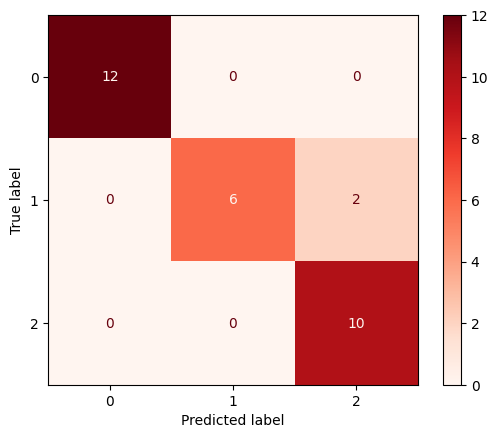

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test_3_class, y_pred_3_class))

cm =confusion_matrix(y_test_3_class, y_pred_3_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["species"].unique())
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [112]:
results_df_3 = pd.DataFrame.from_dict(history_3.history)

<Axes: >

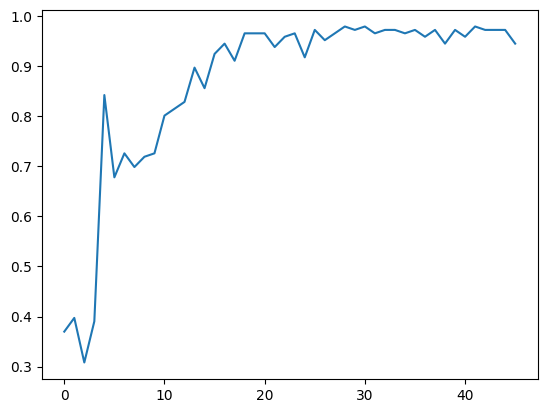

In [113]:
results_df_3['accuracy'].plot()

<Axes: >

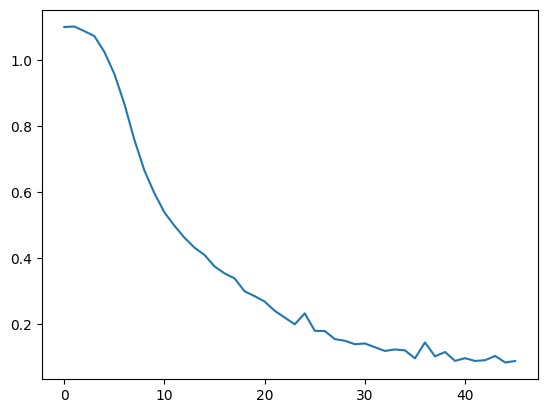

In [114]:
results_df_3['loss'].plot()

Training - <br>
- accuracy: ~94%
- loss: 0.0888 <br>

Testing - <br>
- accuracy: ~93%
- loss: 0.1363

<b> Input layer </b> : activation='sigmoid' <br>
<b> RMSProp optimizer </b> - learning rate: 0.01 <br>
<b> Epochs </b> : 80

## Forth Try: Model_4

In [115]:
# Define, and build your model_4. as model_2
model_4 = Sequential()
model_4.add(Dense(4, input_dim=x.shape[1], kernel_initializer='normal', 
                activation='selu', 
                name='Input')) # Hint: try different activation functions and see which one produces better results.
model_4.add(Dense(10, kernel_initializer='normal', name='Hidden')) 
model_4.add(Dense(y.shape[1],activation='softmax', name='Output'))

sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov=True)

model_4.compile(
    loss='categorical_crossentropy', #rmsprop - optimizer=Adam(learning_rate=0.01) SGD - categorical_crossentropy
    optimizer=sgd, #0.001
    metrics=['accuracy']) # Hint: try different optimizers and see which one produces better results.

# Define the training callbacks.
monitor = EarlyStopping(
    monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

c:\Python\Python3.10.5\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [116]:
model_4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 4)                 20        
                                                                 
 Hidden (Dense)              (None, 10)                50        
                                                                 
 Output (Dense)              (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Train the model.
history_4 = model_4.fit(
    x, y, validation_data=(x_test,y_test),
    callbacks=[monitor], verbose=2, epochs=160)

Epoch 1/160
5/5 - 2s - loss: 1.1042 - accuracy: 0.0000e+00 - val_loss: 1.1014 - val_accuracy: 0.0000e+00 - 2s/epoch - 310ms/step
Epoch 2/160
5/5 - 0s - loss: 1.1036 - accuracy: 0.0000e+00 - val_loss: 1.1009 - val_accuracy: 0.1000 - 85ms/epoch - 17ms/step
Epoch 3/160
5/5 - 0s - loss: 1.1029 - accuracy: 0.1712 - val_loss: 1.1005 - val_accuracy: 0.3000 - 87ms/epoch - 17ms/step
Epoch 4/160
5/5 - 0s - loss: 1.1022 - accuracy: 0.3356 - val_loss: 1.1001 - val_accuracy: 0.3333 - 95ms/epoch - 19ms/step
Epoch 5/160
5/5 - 0s - loss: 1.1014 - accuracy: 0.3425 - val_loss: 1.0994 - val_accuracy: 0.3333 - 102ms/epoch - 20ms/step
Epoch 6/160
5/5 - 0s - loss: 1.1006 - accuracy: 0.3425 - val_loss: 1.0989 - val_accuracy: 0.3333 - 87ms/epoch - 17ms/step
Epoch 7/160
5/5 - 0s - loss: 1.0999 - accuracy: 0.3425 - val_loss: 1.0983 - val_accuracy: 0.3333 - 98ms/epoch - 20ms/step
Epoch 8/160
5/5 - 0s - loss: 1.0991 - accuracy: 0.3425 - val_loss: 1.0977 - val_accuracy: 0.3333 - 101ms/epoch - 20ms/step
Epoch 9/160

In [118]:
#training accuracy:
training_accuracy_values = history_4.history['accuracy']

print("Training Accuracy:", training_accuracy_values[-1])

Training Accuracy: 0.9794520735740662


In [119]:
from sklearn import metrics

# Evaluate the success rate using accuracy.
pred_4 = model_4.predict(x_test)
y_pred_4_class = np.argmax(pred_4,axis=1)

y_test_4_class = np.argmax(y_test,axis=1)
# Log the accuracy score.
score = metrics.accuracy_score(y_test_4_class, y_pred_4_class)
print("Accuracy score: {}".format(score))

1/1 [==============================] - 0s 148ms/step
Accuracy score: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



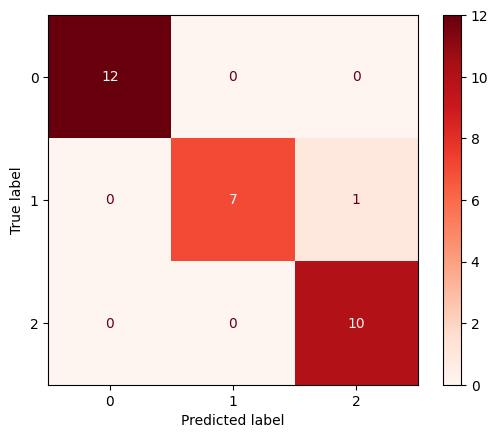

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_4_class, y_pred_4_class))

cm =confusion_matrix(y_test_4_class, y_pred_4_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["species"].unique())
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [121]:
results_df_4 = pd.DataFrame.from_dict(history_4.history)

<Axes: >

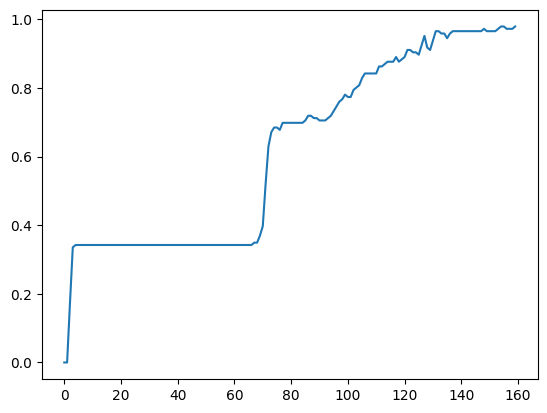

In [122]:
results_df_4['accuracy'].plot()

<Axes: >

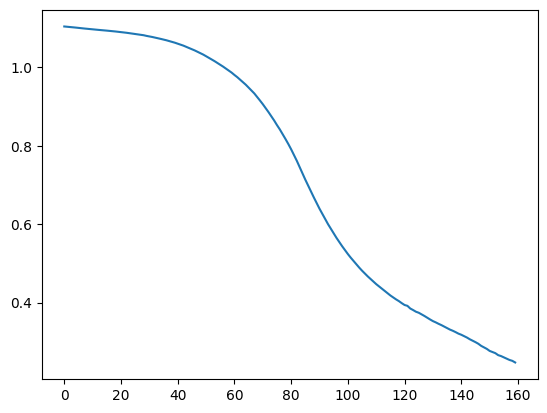

In [123]:
results_df_4['loss'].plot()

Training - <br>
- accuracy: ~98%
- loss: 0.1405 <br>

Testing - <br>
- accuracy: ~97%
- loss: 0.1273

<b> Input layer </b> : activation='selu' <br>
<b> SGD optimizer </b> - learning rate: 0.001 <br>
<b> Epochs </b> : 160

### 5th Try: Model_5

In [132]:
# Define, and build your model_5.
model_5 = Sequential()
model_5.add(Dense(4, input_dim=x.shape[1], kernel_initializer='normal', #
                activation='tanh',
                name='Input')) # Hint: try different activation functions and see which one produces better results.
model_5.add(Dense(10, kernel_initializer='normal', name='Hidden')) 
model_5.add(Dense(y.shape[1],activation='softmax', name='Output'))


model_5.compile(
    loss='categorical_crossentropy', #rmsprop - optimizer=Adam(learning_rate=0.01) SGD - categorical_crossentropy
    optimizer=Adam(learning_rate=0.001), 
    metrics=['accuracy']) # Hint: try different optimizers and see which one produces better results.

# Define the training callbacks.
monitor = EarlyStopping(
    monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [133]:
model_5.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 4)                 20        
                                                                 
 Hidden (Dense)              (None, 10)                50        
                                                                 
 Output (Dense)              (None, 3)                 33        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Train the model.
history_5 = model_5.fit(
    x, y, validation_data=(x_test,y_test),
    callbacks=[monitor], verbose=2, epochs=150)

Epoch 1/150


5/5 - 2s - loss: 1.0874 - accuracy: 0.3425 - val_loss: 1.0900 - val_accuracy: 0.3333 - 2s/epoch - 334ms/step
Epoch 2/150
5/5 - 0s - loss: 1.0831 - accuracy: 0.3425 - val_loss: 1.0857 - val_accuracy: 0.3333 - 91ms/epoch - 18ms/step
Epoch 3/150
5/5 - 0s - loss: 1.0788 - accuracy: 0.3425 - val_loss: 1.0806 - val_accuracy: 0.3333 - 98ms/epoch - 20ms/step
Epoch 4/150
5/5 - 0s - loss: 1.0742 - accuracy: 0.3425 - val_loss: 1.0756 - val_accuracy: 0.3333 - 108ms/epoch - 22ms/step
Epoch 5/150
5/5 - 0s - loss: 1.0684 - accuracy: 0.3425 - val_loss: 1.0698 - val_accuracy: 0.3333 - 89ms/epoch - 18ms/step
Epoch 6/150
5/5 - 0s - loss: 1.0624 - accuracy: 0.3425 - val_loss: 1.0626 - val_accuracy: 0.3333 - 132ms/epoch - 26ms/step
Epoch 7/150
5/5 - 0s - loss: 1.0550 - accuracy: 0.3425 - val_loss: 1.0536 - val_accuracy: 0.3333 - 128ms/epoch - 26ms/step
Epoch 8/150
5/5 - 0s - loss: 1.0463 - accuracy: 0.3562 - val_loss: 1.0435 - val_accuracy: 0.3333 - 121ms/epoch - 24ms/step
Epoch 9/150
5/5 - 0s - loss: 1.03

In [135]:
from sklearn import metrics

# Evaluate the success rate using accuracy.
pred_5 = model_5.predict(x_test)
y_pred_5_class = np.argmax(pred_5,axis=1)

y_test_5_class = np.argmax(y_test,axis=1)

# Log the accuracy score.
score = metrics.accuracy_score(y_test_5_class, y_pred_5_class)
print("Accuracy score: {}".format(score))

1/1 [==============================] - 0s 139ms/step
Accuracy score: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



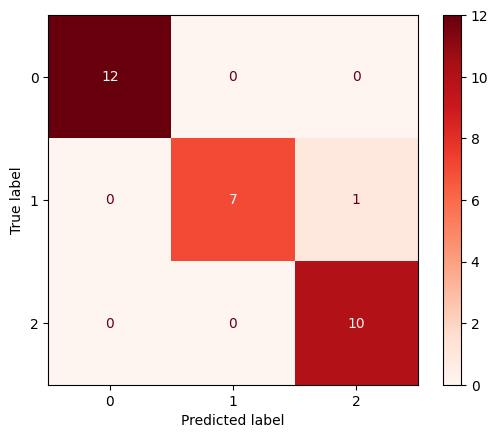

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_5_class, y_pred_5_class))
cm =confusion_matrix(y_test_5_class, y_pred_5_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df["species"].unique())
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [137]:
results_df_5 = pd.DataFrame.from_dict(history_5.history)

<Axes: >

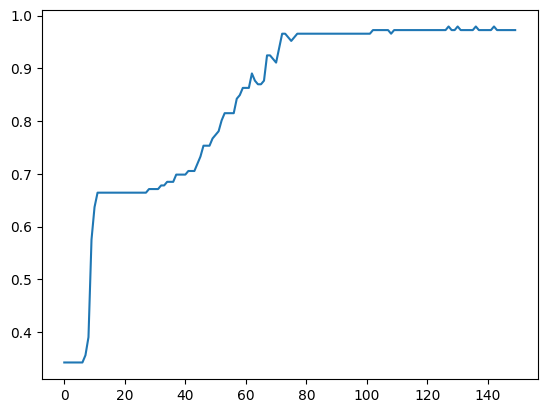

In [138]:
results_df_5['accuracy'].plot()

<Axes: >

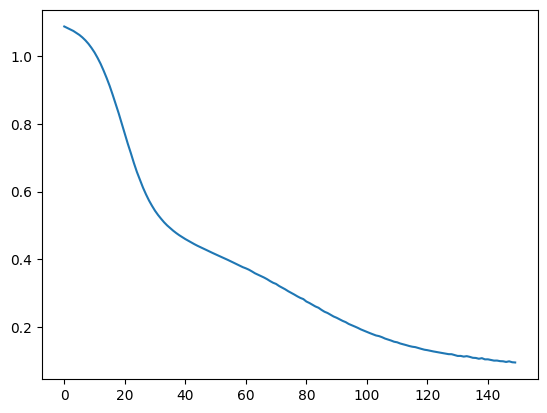

In [139]:
results_df_5['loss'].plot()

Training - <br>
- accuracy: ~97%
- loss: 0.0957 <br>

Testing - <br>
- accuracy: ~97%
- loss: 0.0941

<b> Input layer </b> : activation='tanh' <br>
<b> Adam optimizer </b> - learning rate: 0.001 <br>
<b> Epochs </b> : 150

#### Best outcomes obtanied by : <br>
Model_2, with the following specifiction: <br>
- no. nodes 4 - 10 
- act. 1 : relu
- act. 2 : softmax
- loss: categorical_crossentropy
- Opt: Adam 
- learning rate : 0.001
- epochs: 160

END